# Dataset 1 EDA

In [ ]:
import pandas as pd
df = pd.read_csv('/content/Data_66_featurs.csv')
df.head()

,url_length,url_special_characters,url_tag_script,url_tag_iframe,url_attr_src,url_event_onload,url_event_onmouseover,url_cookie,url_number_keywords_param,url_number_domain,...,js_method_alert,js_method_eval,js_method_fromCharCode,js_method_confirm,js_min_length,js_min_define_function,js_min_function_calls,js_string_max_length,html_length,Label
0,26,0,0,0,0,0,0,0,0,1,...,0,0,0,0,11,0,1,353,11380,0
1,36,0,0,0,0,0,0,0,0,1,...,0,0,0,0,267,0,0,4422,56223,0
2,98,1,1,0,0,0,0,0,1,1,...,1,0,0,1,13,0,1,275,10712,1
3,40,0,0,0,0,0,0,0,0,1,...,0,0,0,0,43,0,0,346,11922,0
4,76,1,0,1,1,0,0,0,0,2,...,8,0,0,0,1879,2,15,1879,14735,1


In [ ]:
df.head(10)

,url_length,url_special_characters,url_tag_script,url_tag_iframe,url_attr_src,url_event_onload,url_event_onmouseover,url_cookie,url_number_keywords_param,url_number_domain,...,js_method_alert,js_method_eval,js_method_fromCharCode,js_method_confirm,js_min_length,js_min_define_function,js_min_function_calls,js_string_max_length,html_length,Label
0,26,0,0,0,0,0,0,0,0,1,...,0,0,0,0,11,0,1,353,11380,0
1,36,0,0,0,0,0,0,0,0,1,...,0,0,0,0,267,0,0,4422,56223,0
2,98,1,1,0,0,0,0,0,1,1,...,1,0,0,1,13,0,1,275,10712,1
3,40,0,0,0,0,0,0,0,0,1,...,0,0,0,0,43,0,0,346,11922,0
4,76,1,0,1,1,0,0,0,0,2,...,8,0,0,0,1879,2,15,1879,14735,1
5,23,0,0,0,0,0,0,0,0,1,...,0,0,0,0,173,1,3,173,12324,0
6,36,0,0,0,0,0,0,0,0,1,...,0,0,0,0,14,0,1,334,28684,0
7,26,0,0,0,0,0,0,0,0,1,...,0,0,1,0,30,0,0,7533,151436,0
8,81,1,1,0,0,0,0,0,0,1,...,1,0,0,0,10,0,0,139,15286,1
9,102,0,0,0,0,0,0,0,0,1,...,0,0,0,0,82,0,2,2516,35728,0


In [ ]:
df.dtypes

,0
url_length,int64
url_special_characters,int64
url_tag_script,int64
url_tag_iframe,int64
url_attr_src,int64
...,...
js_min_define_function,int64
js_min_function_calls,int64
js_string_max_length,int64
html_length,int64


In [ ]:
rows, columns = df.shape
print(rows,columns)

138567 68


# DATA PREPROCESSING

*   Normalizing
*   Class weight





In [ ]:
from sklearn.preprocessing import MinMaxScaler
target_column = 'Label'
X = df.drop(columns=[target_column])  # Features
y = df[target_column]
# Apply Normalization
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# Convert back to DataFrame
X_normalized = pd.DataFrame(X_normalized, columns=X.columns)

# Add the target column back
normalized_data = pd.concat([X_normalized, y.reset_index(drop=True)], axis=1)

normalized_data.to_csv("normalized_dataset.csv", index=False)

print("Data has been normalized and saved successfully!")


Data has been normalized and saved successfully!


In [ ]:
normalized_df = pd.read_csv('/content/normalized_dataset.csv')
normalized_df.head()

,url_length,url_special_characters,url_tag_script,url_tag_iframe,url_attr_src,url_event_onload,url_event_onmouseover,url_cookie,url_number_keywords_param,url_number_domain,...,js_method_alert,js_method_eval,js_method_fromCharCode,js_method_confirm,js_min_length,js_min_define_function,js_min_function_calls,js_string_max_length,html_length,Label
0,0.004766,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.03125,...,0.000000,0.0,0.0,0.000000,0.000014,0.000000,0.000278,0.000076,0.000957,0
1,0.007944,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.03125,...,0.000000,0.0,0.0,0.000000,0.000342,0.000000,0.000000,0.000948,0.004726,0
2,0.027645,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.2,0.03125,...,0.003546,0.0,0.0,0.037037,0.000017,0.000000,0.000278,0.000059,0.000901,1
3,0.009215,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.03125,...,0.000000,0.0,0.0,0.000000,0.000055,0.000000,0.000000,0.000074,0.001002,0
4,0.020655,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.06250,...,0.028369,0.0,0.0,0.000000,0.002404,0.016807,0.004163,0.000403,0.001239,1


In [ ]:
normalized_df.isnull().sum()

,0
url_length,0
url_special_characters,0
url_tag_script,0
url_tag_iframe,0
url_attr_src,0
...,...
js_min_define_function,0
js_min_function_calls,0
js_string_max_length,0
html_length,0


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Assuming normalized_df is your DataFrame and you have a target variable 'target_column'

# Split the data into features (X) and target (y)
X = normalized_df.drop('Label', axis=1)  # Replace 'target_column' with your actual target column name
y = normalized_df['Label']  # Replace with your actual target column name

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model with Ridge regularization (L2 penalty)
ridge_log_reg = LogisticRegression(class_weight='balanced',penalty='l2', solver='liblinear', C=1.0)  # C is the inverse of regularization strength

# Train the model
ridge_log_reg.fit(X_train, y_train)


# Make predictions on the test set
y_pred = ridge_log_reg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Detailed classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Optionally, print the coefficients
print(f"Coefficients: {ridge_log_reg.coef_}")


Accuracy: 0.9761853214981597
Confusion Matrix:
[[19803   142]
 [  518  7251]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     19945
           1       0.98      0.93      0.96      7769

    accuracy                           0.98     27714
   macro avg       0.98      0.96      0.97     27714
weighted avg       0.98      0.98      0.98     27714

Coefficients: [[ -0.02859302   6.37642671   5.02350927   0.69610006   3.09256196
    1.79760747   1.74439776   4.45473287   8.66755845  -4.63438114
   -0.45904274  -0.13815167  -1.01231162   0.7466027    2.24827909
  -14.04296972  -1.70500475   2.77898379   0.54245619  -9.77709117
   -5.07326708  -0.69580077  -0.11366817   0.06328368   0.71687302
    2.83792702   1.28863565   3.51215978  -3.97884621  -0.11011956
   -0.04688022  -1.03583626   1.68443908   4.50865271   1.13290654
    0.22582489  -2.66581955  -1.35046373   0.62326346  -0.04434927
   -0.09222727  -0.136

# DATA VISUALIZATION

Label
0    99999
1    38568
Name: count, dtype: int64


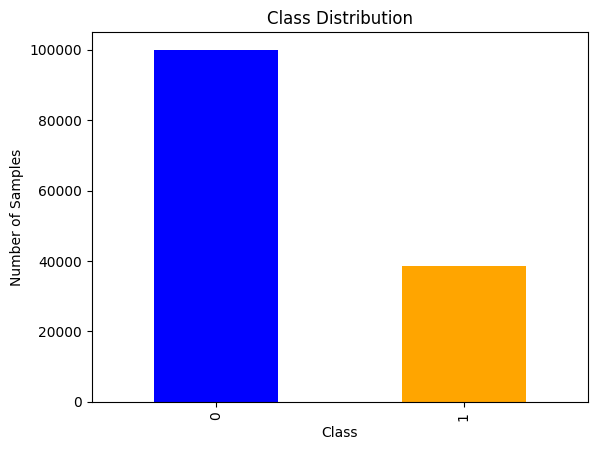

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
y = normalized_df['Label']

# For pandas DataFrame
class_counts = y.value_counts()
print(class_counts)

# Plot the distribution
class_counts.plot(kind='bar', color=['blue', 'orange'])
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.show()

In [ ]:
normalized_data.describe()

,url_length,url_special_characters,url_tag_script,url_tag_iframe,url_attr_src,url_event_onload,url_event_onmouseover,url_cookie,url_number_keywords_param,url_number_domain,...,js_method_alert,js_method_eval,js_method_fromCharCode,js_method_confirm,js_min_length,js_min_define_function,js_min_function_calls,js_string_max_length,html_length,Label
count,138567.000000,138567.000000,138567.000000,138567.000000,138567.000000,138567.000000,138567.000000,138567.000000,138567.000000,138567.000000,...,138567.000000,138567.000000,138567.000000,138567.000000,138567.000000,138567.000000,138567.000000,138567.000000,138567.000000,138567.000000
mean,0.017746,0.257709,0.228922,0.010825,0.032439,0.003421,0.002129,0.048143,0.032273,0.035950,...,0.001488,0.000386,0.002068,0.000744,0.000229,0.000347,0.000415,0.001606,0.006831,0.278335
std,0.020610,0.437375,0.420140,0.103479,0.177164,0.058387,0.046091,0.214069,0.083895,0.017022,...,0.005366,0.003958,0.009224,0.008712,0.005842,0.007765,0.009127,0.010567,0.012638,0.448181
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.006037,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.031250,...,0.000000,0.000000,0.000000,0.000000,0.000012,0.000000,0.000000,0.000097,0.001433,0.000000
50%,0.011757,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.031250,...,0.000000,0.000000,0.000000,0.000000,0.000032,0.000000,0.000000,0.000277,0.003571,0.000000
75%,0.023832,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.031250,...,0.003546,0.000000,0.000000,0.000000,0.000093,0.000000,0.000278,0.000772,0.007780,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Training and Validation

In [ ]:
from sklearn.model_selection import train_test_split
X = normalized_df.drop(columns=['Label'])
y = normalized_df['Label']
# Split into train, validation, and test
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42, stratify=y_train_val)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix


# Initialize logistic regression model
log_reg = LogisticRegression(random_state=42, max_iter=10000)

# Train the model on the training data
log_reg.fit(X_train, y_train)

# Validate the model on the validation set
val_predictions = log_reg.predict(X_val)
val_accuracy = accuracy_score(y_val, val_predictions)
print("Validation Accuracy:", val_accuracy)

# Evaluate on the test set (after selecting the model)
train_predictions = log_reg.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predictions)
print("Train Accuracy after preproccessing:", train_accuracy)

# Detailed classification report
print("\nClassification Report on Training Data:\n", classification_report(y_train, train_predictions))



Validation Accuracy: 0.9791801977339972
Train Accuracy after preproccessing: 0.978217202516268

Classification Report on Training Data:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99     59999
           1       0.99      0.93      0.96     23140

    accuracy                           0.98     83139
   macro avg       0.98      0.96      0.97     83139
weighted avg       0.98      0.98      0.98     83139



Testing

Decreasing the threshold

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Adjust threshold
y_pred_prob = log_reg.predict_proba(X_test)[:, 1]  # Probability for positive class
threshold = 0.4
y_pred = (y_pred_prob > threshold).astype(int)
#print(confusion_matrix(y_test, y_pred))
#y_pred = log_reg.predict(X_test)

print("Testing Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
class_counts = y_test.value_counts()
print(class_counts)

Testing Accuracy: 0.9802626831204445

Confusion Matrix:
 [[19942    58]
 [  489  7225]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99     20000
           1       0.99      0.94      0.96      7714

    accuracy                           0.98     27714
   macro avg       0.98      0.97      0.97     27714
weighted avg       0.98      0.98      0.98     27714

Label
0    20000
1     7714
Name: count, dtype: int64


# Plotting

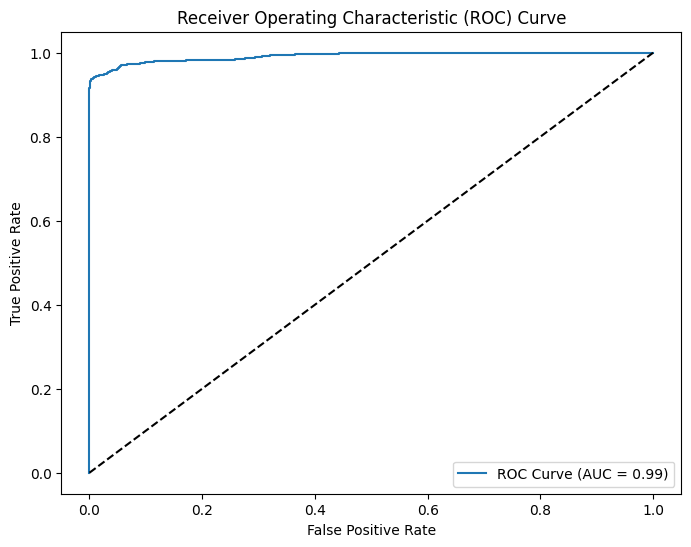

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
#model = LogisticRegression(max_iter=10000)
y_pred_prob = log_reg.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
# or any other model you want to evaluate
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=42, max_iter=10000) # You can replace this with your desired model
# Using StratifiedKFold for balanced class distribution in each fold
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)  # 5 folds, adjust as needed
scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
# 'accuracy' can be replaced with other metrics
print("Cross-validation scores:", scores)
print("Average accuracy:", scores.mean())

Cross-validation scores: [0.98742779 0.98674371 0.98980286 0.98878314 0.98980286 0.99048266
 0.98776343 0.9860639  0.99082257 0.99184228]
Average accuracy: 0.9889535204692466


In [ ]:
from sklearn.model_selection import train_test_split
X = normalized_df.drop(columns=['Label'])
y = normalized_df['Label']
# Split into train, validation, and test
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42, stratify=y_train_val)


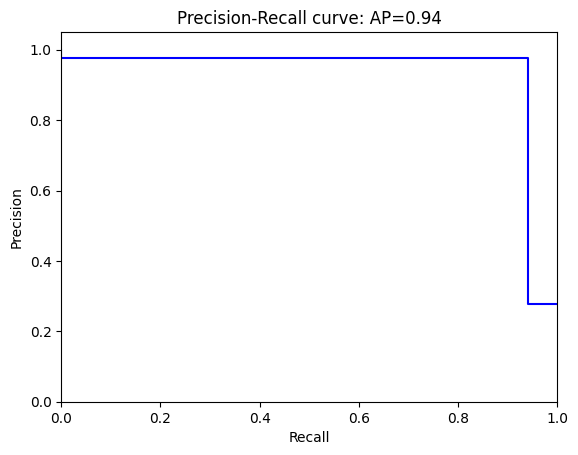

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

# Calculate average precision score
average_precision = average_precision_score(y_test, y_pred)

# Plot the PR curve
plt.figure()
plt.step(recall, precision, color='b', alpha=1, where='post')
#plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
plt.show()

# DATASET 2



In [ ]:
import pandas as pd
j_df = pd.read_csv('/content/xss_dataset.csv')
j_df.head()

,Contains &lt,ScripTag,Readable,Contains And,Contains Percentage,Contains Slash,Contains Plus,Contains Document,Contains SRC,Containss Var,...,Contains Close Brace,Contains Spase,Contains Qutions,Contains Duble Slash,Contains Alert,Contains Break Line,Letters Ratio,Numbuers Ratio,Symbols Ratio,Class
0,0,1,1,0,0,1,0,0,0,0,...,0,0,1,1,1,0,0.7614,0.0114,0.2273,1
1,0,1,1,0,0,1,0,1,0,0,...,0,0,1,1,1,0,0.7203,0.0593,0.2203,1
2,0,1,0,1,1,1,1,1,0,0,...,0,0,0,1,1,0,0.7071,0.1065,0.1864,1
3,0,1,1,0,1,1,0,1,0,0,...,0,0,0,1,1,0,0.7158,0.1053,0.1789,1
4,0,0,0,0,1,1,0,0,0,0,...,0,0,0,1,0,0,0.6483,0.1517,0.2000,1


Class
0    16314
1    13107
Name: count, dtype: int64


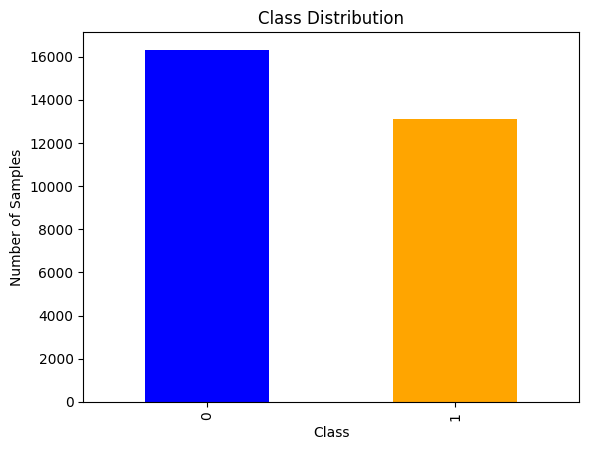

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
y = j_df['Class']
# Assuming `y` is the target column
# For pandas DataFrame
class_counts = y.value_counts()
print(class_counts)

# Plot the distribution
class_counts.plot(kind='bar', color=['blue', 'orange'])
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
X = j_df.drop(columns=['Class'])
y = j_df['Class']
# Split into train, validation, and test
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42, stratify=y_train_val)


Training and Validation

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix


# Initialize logistic regression model
log_reg = LogisticRegression(random_state=42, max_iter=10000)

# Train the model on the training data
log_reg.fit(X_train, y_train)

# Validate the model on the validation set
val_predictions = log_reg.predict(X_val)
val_accuracy = accuracy_score(y_val, val_predictions)
print("Validation Accuracy:", val_accuracy)

# Evaluate on the test set (after selecting the model)
train_predictions = log_reg.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predictions)
print("Train Accuracy after preproccessing:", train_accuracy)

# Detailed classification report
print("\nClassification Report on Training Data:\n", classification_report(y_train, train_predictions))


Validation Accuracy: 0.9903127124405167
Train Accuracy after preproccessing: 0.9884998866983912

Classification Report on Training Data:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      9788
           1       0.99      0.98      0.99      7864

    accuracy                           0.99     17652
   macro avg       0.99      0.99      0.99     17652
weighted avg       0.99      0.99      0.99     17652



Cross validation

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
# or any other model you want to evaluate
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=42, max_iter=10000) # You can replace this with your desired model
# Using StratifiedKFold for balanced class distribution in each fold
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)  # 5 folds, adjust as needed
scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
# 'accuracy' can be replaced with other metrics
print("Cross-validation scores:", scores)
print("Average accuracy:", scores.mean())

Cross-validation scores: [0.98742779 0.98674371 0.98980286 0.98878314 0.98980286 0.99048266
 0.98776343 0.9860639  0.99082257 0.99184228]
Average accuracy: 0.9889535204692466


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

param_grid = {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l2']}
grid_search = GridSearchCV(LogisticRegression(max_iter=10000), param_grid, cv=10, scoring='accuracy')
grid_search.fit(X, y)

print("Best Parameters:", grid_search.best_params_)
print("Best CV Score:", grid_search.best_score_)


Best Parameters: {'C': 10, 'penalty': 'l2'}
Best CV Score: 0.9825336503468461


In [ ]:
# Refit logistic regression with best parameters
best_model = LogisticRegression(C=10, penalty='l2', max_iter=1000)
best_model.fit(X_train, y_train)

# Evaluate on test set
y_pred = best_model.predict(X_test)

# Confusion Matrix and Classification Report
from sklearn.metrics import confusion_matrix, classification_report
print('Accuracy', accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy 0.9892948173322005
Confusion Matrix:
 [[3240   23]
 [  40 2582]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      3263
           1       0.99      0.98      0.99      2622

    accuracy                           0.99      5885
   macro avg       0.99      0.99      0.99      5885
weighted avg       0.99      0.99      0.99      5885



In [ ]:
from sklearn.model_selection import train_test_split
X = j_df.drop(columns=['Class'])
y = j_df['Class']
# Split into train, validation, and test
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42, stratify=y_train_val)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix


# Initialize logistic regression model
log_reg = LogisticRegression(random_state=42, max_iter=10000)

# Train the model on the training data
log_reg.fit(X_train, y_train)

# Validate the model on the validation set
val_predictions = log_reg.predict(X_val)
val_accuracy = accuracy_score(y_val, val_predictions)
print("Validation Accuracy:", val_accuracy)

# Evaluate on the test set (after selecting the model)
train_predictions = log_reg.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predictions)
print("Train Accuracy after preproccessing:", train_accuracy)

# Detailed classification report
print("\nClassification Report on Training Data:\n", classification_report(y_train, train_predictions))
print("\nConfusion Matrix:\n", confusion_matrix(y_train, train_predictions))


Validation Accuracy: 0.9903127124405167
Train Accuracy after preproccessing: 0.9884998866983912

Classification Report on Training Data:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      9788
           1       0.99      0.98      0.99      7864

    accuracy                           0.99     17652
   macro avg       0.99      0.99      0.99     17652
weighted avg       0.99      0.99      0.99     17652


Confusion Matrix:
 [[9718   70]
 [ 133 7731]]


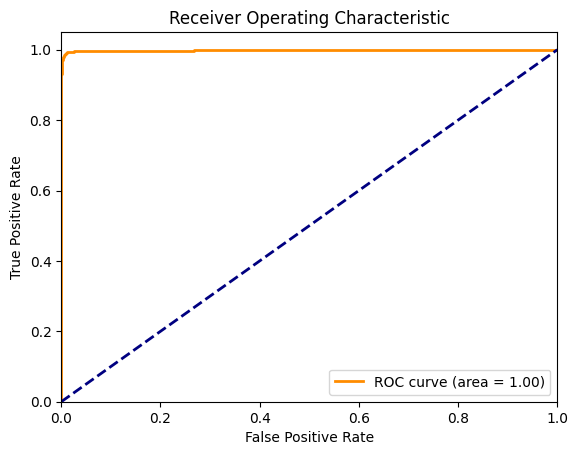

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

y_pred_proba = log_reg.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Adjust threshold
y_pred_prob = log_reg.predict_proba(X_test)[:, 1]  # Probability for positive class
threshold = 0.5
y_pred = (y_pred_prob > threshold).astype(int)
#print(confusion_matrix(y_test, y_pred))
#y_pred = log_reg.predict(X_test)

print("Testing Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Testing Accuracy: 0.989804587935429

Confusion Matrix:
 [[3244   19]
 [  41 2581]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      3263
           1       0.99      0.98      0.99      2622

    accuracy                           0.99      5885
   macro avg       0.99      0.99      0.99      5885
weighted avg       0.99      0.99      0.99      5885



Visualization

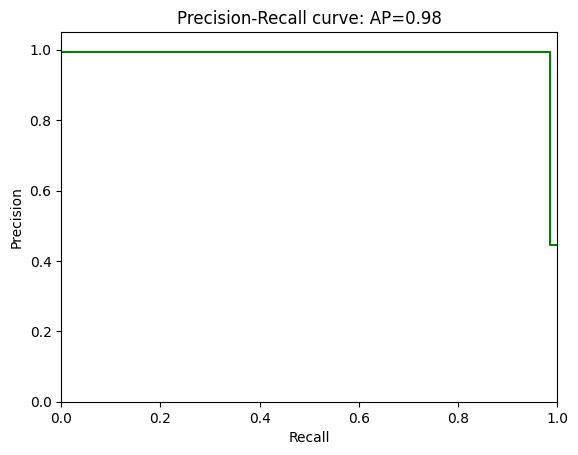

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score

# Calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

# Calculate average precision score
average_precision = average_precision_score(y_test, y_pred)

# Plot the PR curve
plt.figure()
plt.step(recall, precision, color='g', alpha=1, where='post')
#plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
plt.show()

# DATA SET 3

In [2]:
xss = pd.read_csv('/content/xss_normalized.csv')
xss.head()

,url_length,url_special_characters,url_tag_script,url_tag_iframe,url_attr_src,url_event_onload,url_event_onmouseover,url_cookie,url_number_keywords_param,url_number_domain,...,js_method_alert,js_method_eval,js_method_fromCharCode,js_method_confirm,js_min_length,js_min_define_function,js_min_function_calls,js_string_max_length,html_length,Class
0,0.052441,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.2,0.071429,...,0.003546,0.000000,0.0,0.037037,0.000017,0.000000,0.000278,0.000059,0.001068,1
1,0.039180,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.142857,...,0.028369,0.000000,0.0,0.000000,0.002404,0.031250,0.004163,0.000403,0.001468,1
2,0.042194,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.071429,...,0.003546,0.000000,0.0,0.000000,0.000013,0.000000,0.000000,0.000030,0.001523,1
3,0.037975,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.071429,...,0.003546,0.000000,0.0,0.000000,0.000001,0.000000,0.000000,0.000264,0.002890,1
4,0.041591,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.142857,...,0.000000,0.015873,0.0,0.000000,0.000228,0.015625,0.000278,0.000039,0.001032,1


Class
0    100000
1      1000
Name: count, dtype: int64


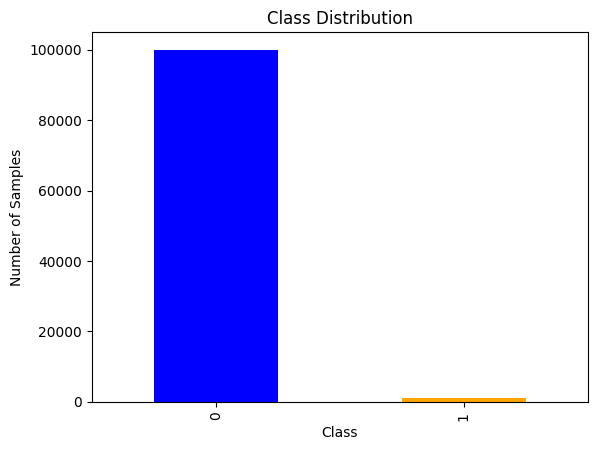

In [4]:
import matplotlib.pyplot as plt
y = xss['Class']

# For pandas DataFrame
class_counts = y.value_counts()
print(class_counts)

# Plot the distribution
class_counts.plot(kind='bar', color=['blue', 'orange'])
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.show()

Training and Validation

In [ ]:
from sklearn.model_selection import train_test_split
X = xss.drop(columns=['Class'])
y = xss['Class']
# Split into train, validation, and test
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42, stratify=y_train_val)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix


# Initialize logistic regression model
log_reg = LogisticRegression(class_weight='balanced', max_iter=10000)

# Train the model on the training data
log_reg.fit(X_train, y_train)

# Validate the model on the validation set
val_predictions = log_reg.predict(X_val)
val_accuracy = accuracy_score(y_val, val_predictions)
print("Validation Accuracy:", val_accuracy)

# Evaluate on the test set (after selecting the model)
train_predictions = log_reg.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predictions)
print("Train Accuracy after preproccessing:", train_accuracy)

# Detailed classification report
print("\nClassification Report on Training Data:\n", classification_report(y_train, train_predictions))


Validation Accuracy: 0.994059405940594
Train Accuracy after preproccessing: 0.9933663366336634

Classification Report on Training Data:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     60000
           1       0.61      0.93      0.74       600

    accuracy                           0.99     60600
   macro avg       0.80      0.96      0.87     60600
weighted avg       1.00      0.99      0.99     60600



Testing

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Adjust threshold
y_pred_prob = log_reg.predict_proba(X_test)[:, 1]  # Probability for positive class
threshold = 0.5
y_pred = (y_pred_prob > threshold).astype(int)
#print(confusion_matrix(y_test, y_pred))
#y_pred = log_reg.predict(X_test)

print("Testing Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Testing Accuracy: 0.9947029702970297

Confusion Matrix:
 [[19903    97]
 [   10   190]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     20000
           1       0.66      0.95      0.78       200

    accuracy                           0.99     20200
   macro avg       0.83      0.97      0.89     20200
weighted avg       1.00      0.99      1.00     20200



Visualization

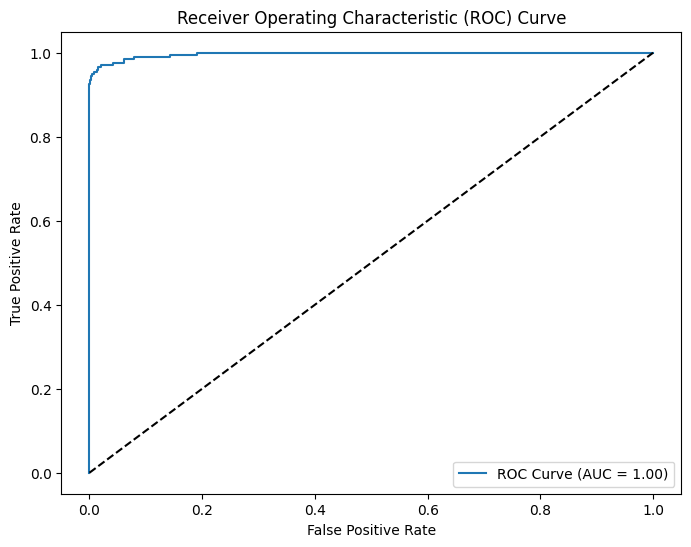

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
#model = LogisticRegression(max_iter=10000)
y_pred_prob = log_reg.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


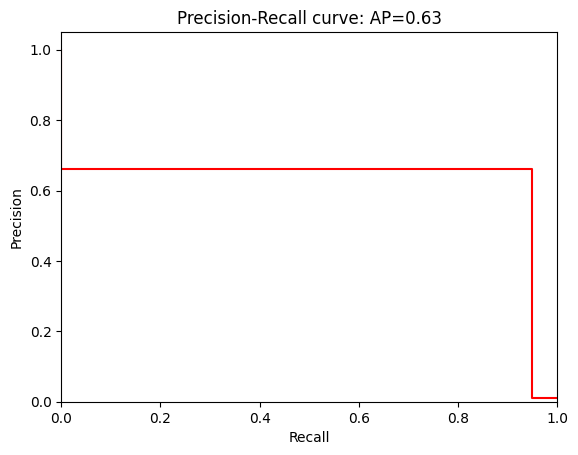

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score

# Calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

# Calculate average precision score
average_precision = average_precision_score(y_test, y_pred)

# Plot the PR curve
plt.figure()
plt.step(recall, precision, color='r', alpha=1, where='post')
#plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix


# Initialize logistic regression model
log_reg = LogisticRegression(random_state=42, max_iter=10000)

# Train the model on the training data
log_reg.fit(X_train, y_train)

# Validate the model on the validation set
val_predictions = log_reg.predict(X_val)
val_accuracy = accuracy_score(y_val, val_predictions)
print("Validation Accuracy:", val_accuracy)

# Evaluate on the test set (after selecting the model)
train_predictions = log_reg.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predictions)
print("Train Accuracy after preproccessing:", train_accuracy)

# Detailed classification report
print("\nClassification Report on Training Data:\n", classification_report(y_train, train_predictions))


Validation Accuracy: 0.9766904813451686
Train Accuracy after preproccessing: 0.9758476767822563

Classification Report on Training Data:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98     59999
           1       0.98      0.93      0.96     23140

    accuracy                           0.98     83139
   macro avg       0.98      0.96      0.97     83139
weighted avg       0.98      0.98      0.98     83139



In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Adjust threshold
y_pred_prob = log_reg.predict_proba(X_test)[:, 1]  # Probability for positive class
threshold = 0.4
y_pred = (y_pred_prob > threshold).astype(int)
#print(confusion_matrix(y_test, y_pred))
#y_pred = log_reg.predict(X_test)

print("Testing Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Testing Accuracy: 0.9772317240383922

Confusion Matrix:
 [[19831   169]
 [  462  7252]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98     20000
           1       0.98      0.94      0.96      7714

    accuracy                           0.98     27714
   macro avg       0.98      0.97      0.97     27714
weighted avg       0.98      0.98      0.98     27714



Label
0    99999
1    38568
Name: count, dtype: int64


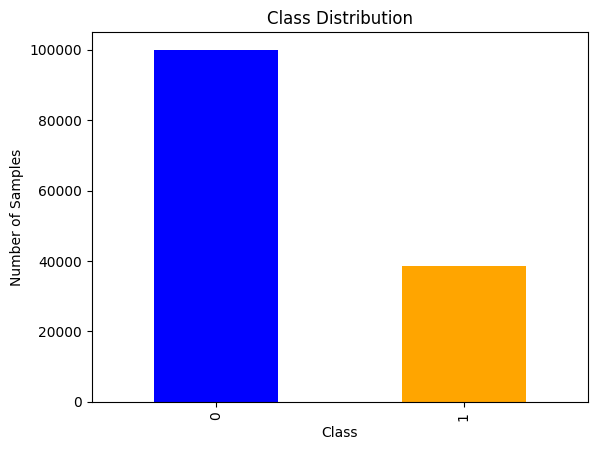

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming `y` is the target column
# For pandas DataFrame
class_counts = y.value_counts()
print(class_counts)

# Plot the distribution
class_counts.plot(kind='bar', color=['blue', 'orange'])
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.show()


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Classifier with balanced weights
model = LogisticRegression(class_weight='balanced', max_iter=1000)
# Or Random Forest
# model = RandomForestClassifier(class_weight='balanced')

# Fit the model
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Testing Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Testing Accuracy: 0.9778090495778307

Confusion Matrix:
 [[19855   145]
 [  470  7244]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98     20000
           1       0.98      0.94      0.96      7714

    accuracy                           0.98     27714
   macro avg       0.98      0.97      0.97     27714
weighted avg       0.98      0.98      0.98     27714



Regularization

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

# Assuming X is your feature matrix and y is your target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define parameter grids for Logistic Regression with L1 and L2 penalties
param_grid = {
    'penalty': ['l1', 'l2'],  # Lasso (L1) and Ridge (L2)
    'C': [0.001, 0.01, 0.1, 1, 10],  # Inverse of regularization strength
    'solver': ['liblinear']  # Solver for L1 penalty
}

# Create and fit GridSearchCV for Logistic Regression
logreg_grid = GridSearchCV(LogisticRegression(max_iter=10000,random_state=42), param_grid, scoring='accuracy', cv=5)
logreg_grid.fit(X_train, y_train)

# Get best model and predictions
best_logreg = logreg_grid.best_estimator_
logreg_pred = best_logreg.predict(X_test)

# Evaluate using accuracy
accuracy = accuracy_score(y_test, logreg_pred)
print("Best Logistic Regression Model:", best_logreg)
print("Accuracy:", accuracy)

Best Logistic Regression Model: LogisticRegression(C=10, max_iter=10000, penalty='l1', random_state=42,
                   solver='liblinear')
Accuracy: 0.9815255827379664


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Assuming y_test are the true labels and y_pred are the predicted labels
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
# roc_auc = roc_auc_score(y_test, y_pred_probs)  # Use predicted probabilities for ROC AUC

In [ ]:
print('Accuracy', accuracy)
print("Precision", precision)
print("Recall", recall)
print("F1", f1)
# print("ROC AUC", roc_auc

Accuracy 0.98008226888937
Precision 0.9950235001382361
Recall 0.9331086336530983
F1 0.9630719828739631


In [ ]:
final_model = best_logreg
X = normalized_df.drop(columns=['Label'])
y = normalized_df['Label']

# Correct train_test_split usage
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

final_model.fit(X_train_full, y_train_full)
y_pred = final_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('Accuracy', accuracy)
print("Precision", precision)
print("Recall", recall)
print("F1", f1)
# print("ROC AUC", roc_auc)  # Uncomment if you want to calculate ROC AUC

Accuracy 0.9815255827379664
Precision 0.9928018470732038
Recall 0.9409190371991247
F1 0.9661644197726672


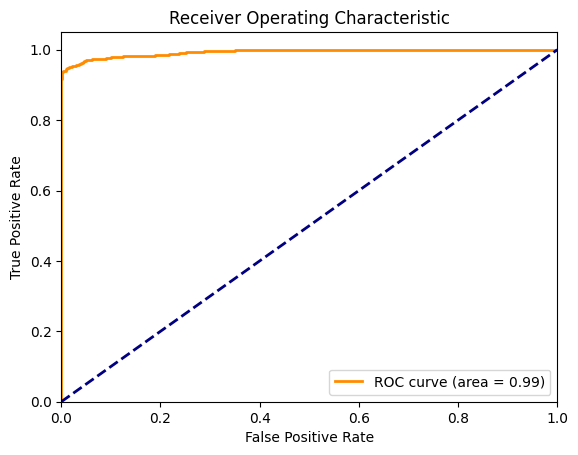

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

y_pred_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Create a Logistic Regression model with Ridge regularization
log_reg_ridge = LogisticRegression(penalty='l2', C=1.0, solver='liblinear', random_state=42)  # Adjust C as needed

# Train the model
log_reg_ridge.fit(X_train, y_train)

# Make predictions
y_pred = log_reg_ridge.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("ROC AUC:", roc_auc)


Accuracy: 0.977267806884607
Precision: 0.9943221160504085
Recall: 0.9241858669069378
F1-score: 0.9579719813208806
ROC AUC: 0.9610651069305308


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize logistic regression model
log_reg = LogisticRegression(random_state=42, max_iter=10000)

# Train the model on the training data
log_reg.fit(X_train, y_train)

# Validate the model on the validation set
val_predictions = log_reg.predict(X_val)
val_accuracy = accuracy_score(y_val, val_predictions)
print("Validation Accuracy:", val_accuracy)

# Evaluate on the test set (after selecting the model)
train_predictions = log_reg.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predictions)
print("Train Accuracy after preproccessing:", train_accuracy)

# Detailed classification report
print("\nClassification Report on Training Data:\n", classification_report(y_train, train_predictions))


Validation Accuracy: 0.9991584158415842
Train Accuracy after preproccessing: 0.9986303630363036

Classification Report on Training Data:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     60000
           1       0.97      0.89      0.93       600

    accuracy                           1.00     60600
   macro avg       0.99      0.94      0.96     60600
weighted avg       1.00      1.00      1.00     60600



In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
y_pred = log_reg.predict(X_test)

print("Testing Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Testing Accuracy: 0.999009900990099

Confusion Matrix:
 [[19995     5]
 [   15   185]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     20000
           1       0.97      0.93      0.95       200

    accuracy                           1.00     20200
   macro avg       0.99      0.96      0.97     20200
weighted avg       1.00      1.00      1.00     20200



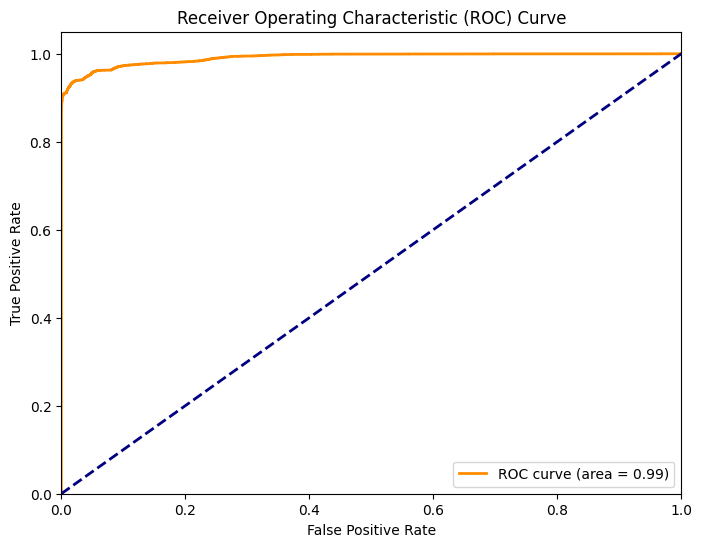

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()